<a href="https://colab.research.google.com/github/vladtsyp/study_deeplearning/blob/main/task_2/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации

## Задание 1. Постройте глубокую нейронную сеть для предсказания цен на недвижимость в Калифорнии, используя датасет «fetch_california_housing»

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
# Ваш код здесь

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. Создайте архитектуру для этой задачи

In [ ]:
# Ваш код здесь
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(8, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [ ]:
# Ваш код здесь
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # adam
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
491/491 [==============================] - 2s 3ms/step - loss: 0.7705 - mae: 0.5536 - val_loss: 0.3550 - val_mae: 0.4256
Epoch 2/100
491/491 [==============================] - 1s 2ms/step - loss: 0.3842 - mae: 0.4367 - val_loss: 0.3112 - val_mae: 0.4134
Epoch 3/100
491/491 [==============================] - 1s 2ms/step - loss: 0.3570 - mae: 0.4201 - val_loss: 0.2965 - val_mae: 0.3967
Epoch 4/100
491/491 [==============================] - 1s 2ms/step - loss: 0.3326 - mae: 0.4060 - val_loss: 0.2771 - val_mae: 0.3857
Epoch 5/100
491/491 [==============================] - 1s 2ms/step - loss: 0.3347 - mae: 0.4016 - val_loss: 0.2756 - val_mae: 0.3759
Epoch 6/100
491/491 [==============================] - 1s 2ms/step - loss: 0.3293 - mae: 0.3945 - val_loss: 0.2743 - val_mae: 0.3766
Epoch 7/100
491/491 [==============================] - 1s 2ms/step - loss: 0.3195 - mae: 0.3880 - val_loss: 0.2686 - val_mae: 0.3756
Epoch 8/100
491/491 [==============================] - 1s 2ms/step - 

#### 1.5. Сделайте вывод, хорошо ли модель обучается?

Если модель обучается плохо, можете внести изменения в работу.

In [ ]:
# Ваш вывод здесь
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [ ]:
# Ваш вывод здесь
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

fig.show()

#### 1.6. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь

results = model.predict(X_test)
print(results[0], y_test[0])
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 3ms/step
[1.4376945] 1.369
129/129 [==============================] - 0s 3ms/step - loss: 0.2689 - mae: 0.3385


[0.2688635289669037, 0.3384903371334076]

#### 1.7. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

129/129 [==============================] - 0s 1ms/step - loss: 0.2727 - mae: 0.3494
Mean squared error on test data:  0.27268096804618835
Mean absolute error on test data:  0.3493528962135315


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  0.5289841670367208
Mean absolute error on test data:  0.5351261336554506


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

mse_dt = metrics.mean_squared_error(y_test, y_pred_tree)
mae_dt = metrics.mean_absolute_error(y_test, y_pred_tree)

print('Mean squared error on test data: ', mse_dt)
print('Mean absolute error on test data: ', mae_dt)

Mean squared error on test data:  0.5283038061328731
Mean absolute error on test data:  0.4672879481589148


## Задание 2. Обучить модель глубокой нейронной сети для решения задачи классификации изображений на своём датасете.
1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в 
примере с пары были кошки, собаки и панды).
2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество 
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/
3. Обучить модель глубокой нейронной сети для решения задачи классификации 
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары).
В конечном итоге Вы должны сохранить обученную модель для классификации 
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.
При выполнении заданий пробуйте использовать разные функции потерь, 
методы оптимизации, функции активации и метрики ошибок. 

In [ ]:
from zipfile import ZipFile
 
with ZipFile("/content/drive/MyDrive/Colab Notebooks/task2_2/dataset.zip", "r") as myzip:
    myzip.extractall(path='dataset')

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# импортируем бэкенд Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
# инициализируем данные и метки 
print("[INFO] loading images...")
data = []
labels = []

# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/dataset")))

# random.seed(420)
random.shuffle(imagePaths)
print('[INFO] LOADED.')

[INFO] loading images...
[INFO] LOADED.


In [ ]:
# цикл по изображениям
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (64, 64)).flatten() # меняем его разрешение на 64x64 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 64x64x3 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
  # trainX, trainY = data, labels
  # testX, testY = dataT, labelsT
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [ ]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# определим архитектуру 12288-1024-512-128-3 с помощью Keras
model = Sequential()
model.add(Dense(1024, input_shape=(12288,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(128, activation="relu")) # # #128!
model.add(Dense(len(lb.classes_), activation="softmax"))

In [ ]:
# инициализируем скорость обучения и общее число эпох, и количество батчей
INIT_LR = 0.0001
EPOCHS = 320
BATCHES = 256

In [ ]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] compile network...")
opt = SGD(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compile network...


In [ ]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=BATCHES)

Epoch 1/320
10/10 [==============================] - 4s 361ms/step - loss: 1.1600 - accuracy: 0.3110 - val_loss: 1.0958 - val_accuracy: 0.3752
Epoch 2/320
10/10 [==============================] - 4s 426ms/step - loss: 1.0853 - accuracy: 0.4014 - val_loss: 1.0793 - val_accuracy: 0.4078
Epoch 3/320
10/10 [==============================] - 4s 441ms/step - loss: 1.0775 - accuracy: 0.4073 - val_loss: 1.0731 - val_accuracy: 0.4241
Epoch 4/320
10/10 [==============================] - 3s 307ms/step - loss: 1.0722 - accuracy: 0.4270 - val_loss: 1.0684 - val_accuracy: 0.4266
Epoch 5/320
10/10 [==============================] - 3s 308ms/step - loss: 1.0676 - accuracy: 0.4404 - val_loss: 1.0637 - val_accuracy: 0.4404
Epoch 6/320
10/10 [==============================] - 4s 426ms/step - loss: 1.0633 - accuracy: 0.4345 - val_loss: 1.0599 - val_accuracy: 0.4467
Epoch 7/320
10/10 [==============================] - 4s 428ms/step - loss: 1.0594 - accuracy: 0.4437 - val_loss: 1.0566 - val_accuracy: 0.4567

In [ ]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
25/25 [==============================] - 3s 115ms/step
              precision    recall  f1-score   support

       apple       0.61      0.60      0.61       321
      banana       0.56      0.61      0.58       289
      orange       0.61      0.54      0.57       187

    accuracy                           0.59       797
   macro avg       0.59      0.58      0.59       797
weighted avg       0.59      0.59      0.59       797



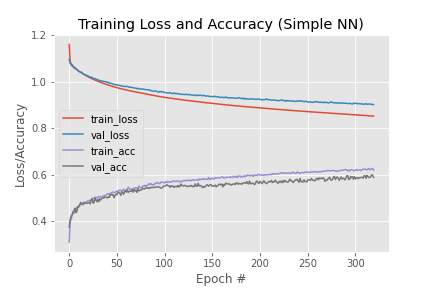

In [ ]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

In [ ]:
# сохраняем модель и метки классов в бинарном представлении на диск
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


Загрузка тестового изображения и предсказание для него

Saving orange.jpg to orange.jpg


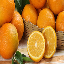

In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

In [ ]:
# "Выравниваем" изображение (преобразуем его в вектор. Из 32х32х3 -> 3072)
image = image.flatten()
# масштабируем значения пикселей к диапазону [0, 1]
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

# загружаем модель и бинаризатор меток
# загружать будем уже обученную ранее модель с хорошими показателями
# информация по ней есть в папке
# (обучена была на тех же показателях, том же датасете)
from keras import models    
print("[INFO] loading network and label binarizer...")
model = models.load_model("/content/drive/MyDrive/Colab Notebooks/task2_2/!m_12288-1024-512-128-3-320E-00001S-256B_v2/model.h5")
lb = pickle.loads(open("/content/drive/MyDrive/Colab Notebooks/task2_2/!m_12288-1024-512-128-3-320E-00001S-256B_v2/label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [ ]:
# делаем предсказание на изображении
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 71ms/step
[[0.21674034 0.3669198  0.4163399 ]]


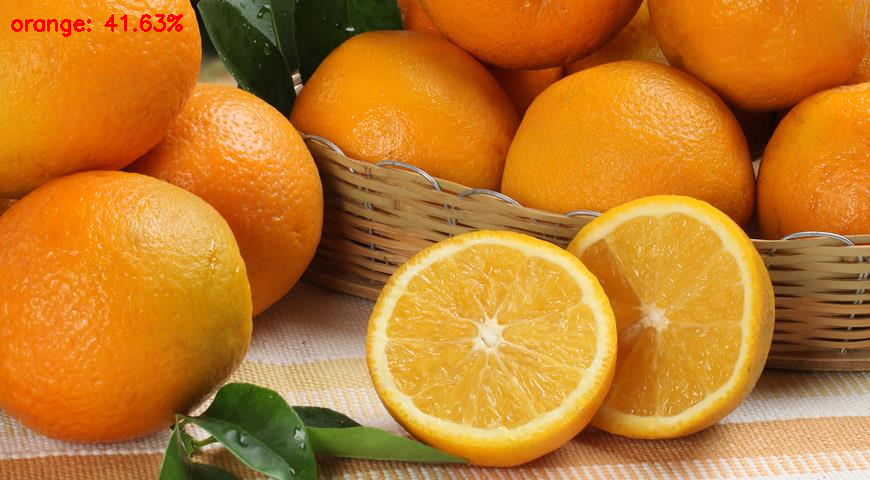

In [ ]:
# находим индекс метки класса с наибольшей вероятностью
# соответствия
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

# Добавляем на исходное изображение метку класса и вероятность прогноза
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)

# показываем выходное изображение
cv2_imshow(output)